# Email Spam Detection using TFIDFVectorizer.

In [1]:
# Import Relevant Libraries.

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

In [2]:
# Load the dataset.

df = pd.read_csv('C:\\Users\\hp\\Desktop\\spam_detection\\spam.csv')
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Label        5572 non-null object
EmailText    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
# The above info shows that there are no null values in the dataset.

In [5]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.groupby(df.Label).describe()

EmailText                                                               
          count unique                                                top freq
Label                                                                         
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

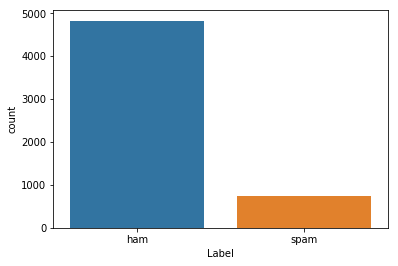

In [8]:
import seaborn as sns

sns.countplot(df['Label'])

TEXT PREPROCESSING

In [9]:
# Remove duplicates.

df.drop_duplicates(inplace = True)

In [10]:
df.shape

(5169, 2)

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Remove punctuations and stop words.
# Creating a function to perform the tasks.
# The below function works in preprocessing text for both Count and Tfidf Vectorizers.

def preprocess(text):
    # Removing punctuations.
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenizing, and then Removing stopwords.
    clean = [word for word in text.split() if word.lower() not in stopwords.words('english')] # If word is not in stopwords.words, release (print) it else, hold it back (delete).
    
    return " ".join(clean)
    

In [31]:
# Applying the function to the input feature (EmailText).

df['cleaned_mssg'] = df['EmailText'].apply(preprocess)

In [32]:
df['cleaned_mssg'].head()

0    Go jurong point crazy Available bugis n great ...
1                              Ok lar Joking wif u oni
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3                  U dun say early hor U c already say
4          Nah dont think goes usf lives around though
Name: cleaned_mssg, dtype: object

In [39]:
len(df['cleaned_mssg'])

5169

In [33]:
# Using LabelBinarizer to encode the label

from sklearn.preprocessing import LabelBinarizer

label = LabelBinarizer()
df['Label'] = label.fit_transform(df['Label'])

In [34]:
# View the output

df.head(3)

,Label,EmailText,cleaned_mssg
0,0,"Go until jurong point, crazy.. Available only ...",Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...


In [35]:
# Converting texts to vectors.

vectorize = TfidfVectorizer(ngram_range=(1, 2), max_df=0.7, min_df=2)
features = vectorize.fit_transform(df['cleaned_mssg'])

In [38]:
features

<5169x7439 sparse matrix of type '<class 'numpy.float64'>'
	with 49067 stored elements in Compressed Sparse Row format>

In [36]:
# Define x and y.

x = features
y = df['Label']

In [37]:
# Shape of x and y.

print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (5169, 7439)
Shape of y:  (5169,)


In [40]:
# Split into train and test sets.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [41]:
# Shape of train set.

print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

x_train:  (4135, 7439)
y_train:  (4135,)


In [42]:
# Shape of test set.

print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_test:  (1034, 7439)
y_test:  (1034,)


MODEL BUILDING

In [43]:
# ALGORITHM 1
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [44]:
# Training/fitting the Logistic Regression model.

lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Predicting the model.

y_pred1 = lr.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Model Evaluation.
from sklearn import metrics

# let's create a function for evaluation.
def evaluate(test, pred):
    accuracy = metrics.accuracy_score(test, pred)
    con_mat = metrics.confusion_matrix(test, pred)
    report = metrics.classification_report(test, pred)
    
    print('accuracy: {:.3f}'.format(accuracy))
    print()
    print('confusion matrix:\n',con_mat)
    print()
    print('classification report:\n',report)

In [47]:
# Let's evaluate.

evaluate(y_test, y_pred1)

accuracy: 0.939

confusion matrix:
 [[908   0]
 [ 63  63]]

classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       908
           1       1.00      0.50      0.67       126

    accuracy                           0.94      1034
   macro avg       0.97      0.75      0.82      1034
weighted avg       0.94      0.94      0.93      1034



In [49]:
# Let's compare train and test accuracies.

print('test accuracy: {:.3f}'.format(lr.score(x_test, y_test)))
print('train accuracy: {:.3f}'.format(lr.score(x_train, y_train)))

test accuracy: 0.939
train accuracy: 0.962


In [50]:
# ALGORITHM 2
# NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB

In [51]:
# Train the Naive Bayes model.

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
# Making Prediction.

y_pred2 = nb.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
# Evaluating the Model's Performance.

evaluate(y_test, y_pred2)

accuracy: 0.963

confusion matrix:
 [[908   0]
 [ 38  88]]

classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       908
           1       1.00      0.70      0.82       126

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [ ]:
# COMMENT: Explain precision, recall, f1-score.

In [54]:
# Let's compare train and test accuracies.

print('test accuracy: {:.3f}'.format(nb.score(x_test, y_test)))
print('train accuracy: {:.3f}'.format(nb.score(x_train, y_train)))

test accuracy: 0.963
train accuracy: 0.976


In [55]:
# ALGORITHM 3
# Support Vector Classifier

from sklearn.svm import SVC

In [56]:
# Fit the SVC model.

svc = SVC()
svc.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
# Predict.

y_pred3 = svc.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
# Evaluate.

evaluate(y_test, y_pred3)

accuracy: 0.878

confusion matrix:
 [[908   0]
 [126   0]]

classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       908
           1       0.00      0.00      0.00       126

    accuracy                           0.88      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.77      0.88      0.82      1034



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
# Let's compare train and test accuracies.

print('test accuracy: {:.3f}'.format(svc.score(x_test, y_test)))
print('train accuracy: {:.3f}'.format(svc.score(x_train, y_train)))

test accuracy: 0.878
train accuracy: 0.873


CROSS VALIDATING OUR MODELS

In [60]:
# To ensure that every data in the data set is involved in training and validation.

from sklearn.model_selection import cross_val_score

# Validation score for our Logistic Regression model.

lr_score = cross_val_score(lr, x, y, cv=10, scoring='accuracy')
lr_score

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95945946, 0.95173745, 0.93436293, 0.94390716, 0.94970986,
       0.94777563, 0.93604651, 0.9496124 , 0.95155039, 0.95155039])

In [61]:
# Validation score for our Naive Bayes model.

nb_score = cross_val_score(nb, x, y, cv=10, scoring='accuracy')
nb_score

array([0.97876448, 0.97683398, 0.96332046, 0.96711799, 0.9729207 ,
       0.96711799, 0.97093023, 0.97286822, 0.97093023, 0.97286822])

In [62]:
# Validation score for our SVC model.

svc_score = cross_val_score(lr, x, y, cv=10, scoring='accuracy')
svc_score

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95945946, 0.95173745, 0.93436293, 0.94390716, 0.94970986,
       0.94777563, 0.93604651, 0.9496124 , 0.95155039, 0.95155039])

In [64]:
# Which of these three models has the highest average validation score?

print('Logistic Regression: {:.3f}'.format(lr_score.mean()))
print('Naive Bayes: {:.3f}'.format(nb_score.mean()))
print('SVC: {:.3f}'.format(svc_score.mean()))

Logistic Regression: 0.948
Naive Bayes: 0.971
SVC: 0.948


In [65]:
# We will therefore use Naive Bayes as our Email Spam Classification Model.
# It has little parameters for tuning and will likely not require GridSearchCv for optimization.

FURTHER OPTIMIZATION

In [ ]:
# We will apply a Token Normalization technique known as STEMMING to see if it will improve the model.
# We can also try normalizing the length of the words / Lemmatizing.